In [1]:
!pip install rarfile --quiet
!apt-get update
!apt-get install -y swig
!pip install stable-baselines3 > /dev/null
!pip install box2d-py > /dev/null
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!sudo apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [973 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,591 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://archive.ub

In [2]:
# install dependencies
!pip3 install gym --upgrade
!pip3 install pyglet
!pip3 install Box2D
!pip3 install box2d-py
!pip3 install gym[Box_2D]
!pip3 install gym[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 13.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827622 sha256=206141a93ad0e69dbaee0ad42fd3ec38dd3faf2e85016252d119def4b20af047
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.9 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.3/884.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [3]:
!sudo apt-get update
!sudo apt-get install xvfb

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfon

In [4]:
import torch

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

The input state of the Lunar Lander consists of following components:

  1. Horizontal Position
  2. Vertical Position
  3. Horizontal Velocity
  4. Vertical Velocity
  5. Angle
  6. Angular Velocity
  7. Left Leg Contact
  8. Right Leg Contact

The actions of the agents are:
  1. Do Nothing
  2. Fire Main Engine
  3. Fire Left Engine
  4. Fire Right Engine

In [5]:
# enviroment
import gym
env = gym.make('LunarLander-v2', render_mode="rgb_array")
#TODO: find observation size: 8
state_size = env.observation_space.shape[0]
#TODO: find action size: 4: 0- Do nothing 1- Fire left engine 2- Fire down engine 3- Fire right engine
action_size = env.action_space.n
state_size, action_size

(8, 4)

In [6]:
# VIDEO
import io
import os
import glob
import torch
import base64
import stable_baselines3
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.results_plotter import ts2xy, load_results
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_util import make_atari_env
import gym
from gym import spaces
from gym.wrappers import RecordVideo
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
from IPython import display as ipythondisplay
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import random
from collections import namedtuple, deque
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
      mp4 = mp4list[0]
      video = io.open(mp4, 'r+b').read()
      encoded = base64.b64encode(video)
      ipythondisplay.display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;">
                  <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                </video>'''.format(encoded.decode('ascii'))))
  else:
      print("Could not find video")

In [7]:
# experience replay
import random
from collections import namedtuple, deque

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward', 'done'))

class ExperienceReplay():
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def store_trans(self, s, a, sp, r, done):
        transition = Transition(s, a, sp, r, done)
        self.memory.append(transition)

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)


In [8]:
# DQN
import torch.nn as nn
import torch.nn.functional as F

#Mine
class DeepQNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(DeepQNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(state_size, 512),
            nn.ReLU(),
            nn.LayerNorm(512),
            nn.Dropout(0.1),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.LayerNorm(512),
            nn.Dropout(0.1),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, action_size)
        )

    def forward(self, x):
        return self.net(x)


## DQN

In [9]:
# DQN agent
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# class DQNAgent():
#     # NOTE: DON'T change initial values
#     def __init__(self, state_size, action_size, batch_size,
#                  gamma=0.99, buffer_size=25000, alpha=1e-4):
#         # network parameter
#         self.state_size = state_size
#         self.action_size = action_size

#         # hyperparameters
#         self.batch_size = batch_size
#         self.gamma = gamma

#         # experience replay
#         self.experience_replay = ExperienceReplay(buffer_size)

#         # network
#         self.value_net = DeepQNetwork(state_size, action_size).to(device)

#         # optimizer
#         # TODO: create adam for optimizing network's parameter (learning rate=alpha)
#         self.optimizer = optim.Adam(self.value_net.parameters(), lr=alpha)

#     def take_action(self, state, eps=0.0):
#         # TODO: take action using e-greedy policy
#         # NOTE: takes action using the greedy policy with a probability of 1−𝜖 and a random action with a probability of 𝜖
#         # NOTE:
#         self.value_net.eval()
#         rand_eps = random.random()
#         if rand_eps > eps:
#             with torch.no_grad():
#                 return torch.argmax(self.value_net(torch.tensor(state).to(device))).detach().cpu().numpy()
#         else:
#             return np.random.randint(0, self.action_size)

#     def update_params(self):
#         if len(self.experience_replay) < self.batch_size:
#             return
#         # transition batch
#         batch = Transition(*zip(*self.experience_replay.sample(self.batch_size)))

#         state_batch = torch.from_numpy(np.vstack(batch.state)).float().to(device)  # [8, 8]
#         action_batch = torch.tensor(np.vstack(batch.action)).long().to(device) # [8, 1]
#         next_state_batch = torch.from_numpy(np.vstack(batch.next_state)).float().to(device) # [8, 8]
#         reward_batch = torch.tensor(np.vstack(batch.reward)).float().to(device) # [8, 1]
#         done_batch = torch.tensor(np.vstack(batch.done)).to(device)

#         # calculate loss w.r.t DQN algorithm
#         self.value_net.train()
#         # STEP1
#         q_expected = self.value_net(state_batch).gather(1, action_batch)
#         # TODO: compute the expected Q values [y]
#         # STEP2
#         # TODO: compute Q values [Q(s_t, a)]
#         q_targets_next = self.value_net(next_state_batch).detach().max(1)[0].unsqueeze(1)
#         q_targets = reward_batch + (self.gamma * q_targets_next * (1 - done_batch*1))
#         # STEP3
#         # TODO: compute mse loss
#         loss = nn.functional.mse_loss(q_expected, q_targets)
#         # TODO: optimize the model
#         # NOTE: DON'T forget to set the gradients to zeros
#         self.optimizer.zero_grad()
#         loss.backward()
#         self.optimizer.step()
#     def save(self, fname):
#         # TODO: save checkpoint
#         torch.save(self.value_net, fname)

#     def load(self, fname, device):
#         # TODO: load checkpoint
#         self.value_net = torch.load(fname, device)


# Mine
class DQNAgent():
    def __init__(self, state_size, action_size, batch_size, gamma=0.99, buffer_size=25000, alpha=1e-4, tau=1e-3):
        self.state_size = state_size
        self.action_size = action_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau  # For soft update of target network parameters
        self.experience_replay = ExperienceReplay(buffer_size)

        # Main network
        self.value_net = DeepQNetwork(state_size, action_size).to(device)
        # Target network
        self.target_net = DeepQNetwork(state_size, action_size).to(device)
        self.target_net.load_state_dict(self.value_net.state_dict())
        self.target_net.eval()  # Target network does not train

        self.optimizer = optim.Adam(self.value_net.parameters(), lr=alpha)

    def take_action(self, state, eps=0.0):
        self.value_net.eval()
        if random.random() > eps:
            with torch.no_grad():
                return torch.argmax(self.value_net(torch.tensor(state).float().unsqueeze(0).to(device))).item()
        else:
            return np.random.randint(0, self.action_size)

    def update_params(self):
        if len(self.experience_replay) < self.batch_size:
            return
        batch = Transition(*zip(*self.experience_replay.sample(self.batch_size)))

        state_batch = torch.tensor(np.array(batch.state), dtype=torch.float32).to(device)
        action_batch = torch.tensor(batch.action, dtype=torch.int64).unsqueeze(1).to(device)
        next_state_batch = torch.tensor(np.array(batch.next_state), dtype=torch.float32).to(device)
        reward_batch = torch.tensor(batch.reward, dtype=torch.float32).unsqueeze(1).to(device)
        done_batch = torch.tensor(batch.done, dtype=torch.float32).unsqueeze(1).to(device)

        q_expected = self.value_net(state_batch).gather(1, action_batch)
        q_targets_next = self.target_net(next_state_batch).detach().max(1)[0].unsqueeze(1)
        q_targets = reward_batch + (self.gamma * q_targets_next * (1 - done_batch))
        loss = F.mse_loss(q_expected, q_targets)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Soft update target network parameters
        for target_param, local_param in zip(self.target_net.parameters(), self.value_net.parameters()):
            target_param.data.copy_(self.tau * local_param.data + (1.0 - self.tau) * target_param.data)

    def save(self, fname):
        torch.save(self.value_net.state_dict(), fname)

    def load(self, fname):
        self.value_net.load_state_dict(torch.load(fname, map_location=device))



In [10]:
# NOTE: DON'T change values
n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 32

In [11]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes + 1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 25	Average Reward: -123.60	Epsilon: 0.47
Episode 49	Average Reward: -111.83	Epsilon: 0.22Moviepy - Building video /content/DQN/batch32/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps50/rl-video-episode-0.mp4



/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -110.86	Epsilon: 0.22
Episode 75	Average Reward: 11.34	Epsilon: 0.10
Episode 99	Average Reward: 60.73	Epsilon: 0.05Moviepy - Building video /content/DQN/batch32/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 73.53	Epsilon: 0.05
Episode 125	Average Reward: 37.78	Epsilon: 0.02
Episode 149	Average Reward: 88.45	Epsilon: 0.01Moviepy - Building video /content/DQN/batch32/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 88.85	Epsilon: 0.01
Episode 175	Average Reward: 226.50	Epsilon: 0.01
Episode 199	Average Reward: 212.39	Epsilon: 0.01Moviepy - Building video /content/DQN/batch32/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 211.92	Epsilon: 0.01
Episode 225	Average Reward: 257.89	Epsilon: 0.01
Episode 249	Average Reward: 231.80	Epsilon: 0.01Moviepy - Building video /content/DQN/batch32/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: 230.72	Epsilon: 0.01


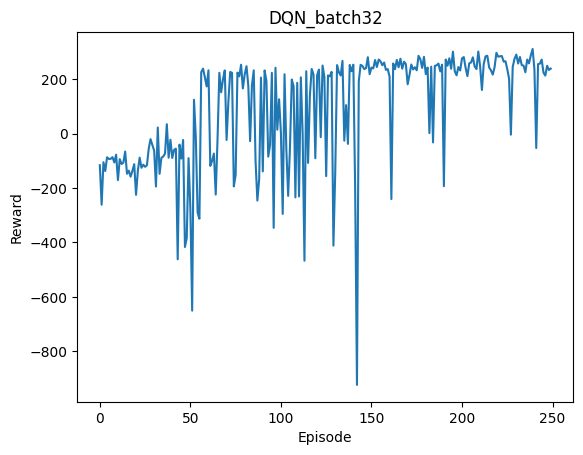

0

In [12]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

# Batch 64

In [13]:
# NOTE: DON'T change values
n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 64

In [14]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes + 1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 25	Average Reward: -157.51	Epsilon: 0.47
Episode 49	Average Reward: -178.48	Epsilon: 0.22Moviepy - Building video /content/DQN/batch64/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -175.24	Epsilon: 0.22
Episode 75	Average Reward: 6.67	Epsilon: 0.10
Episode 99	Average Reward: 37.77	Epsilon: 0.05Moviepy - Building video /content/DQN/batch64/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 49.86	Epsilon: 0.05
Episode 125	Average Reward: 113.18	Epsilon: 0.02
Episode 149	Average Reward: 170.41	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 162.35	Epsilon: 0.01
Episode 175	Average Reward: 92.24	Epsilon: 0.01
Episode 199	Average Reward: 169.26	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 177.33	Epsilon: 0.01
Episode 225	Average Reward: 118.35	Epsilon: 0.01
Episode 249	Average Reward: 75.09	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: 76.11	Epsilon: 0.01


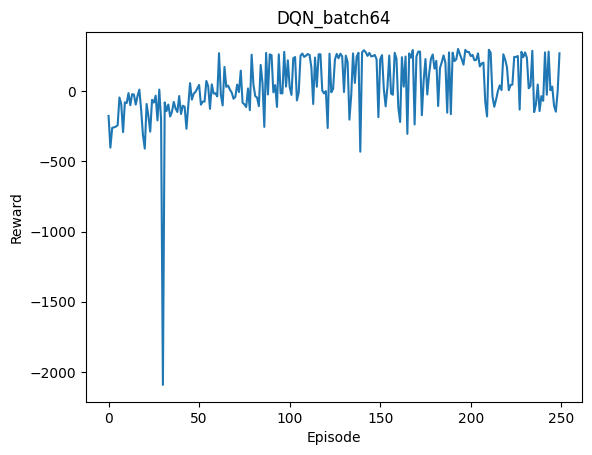

0

In [15]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

# BATCH 128

In [17]:
# NOTE: DON'T change values
n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 128

In [19]:
# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes + 1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -155.53	Epsilon: 0.19
Episode 49	Average Reward: -197.31	Epsilon: 0.09Moviepy - Building video /content/DQN/batch128/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -202.81	Epsilon: 0.09
Episode 75	Average Reward: -227.52	Epsilon: 0.04
Episode 99	Average Reward: -218.69	Epsilon: 0.02Moviepy - Building video /content/DQN/batch128/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: -227.24	Epsilon: 0.02
Episode 125	Average Reward: -166.38	Epsilon: 0.01
Episode 149	Average Reward: -67.67	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: -51.76	Epsilon: 0.01
Episode 175	Average Reward: 23.06	Epsilon: 0.01
Episode 199	Average Reward: 56.84	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 42.67	Epsilon: 0.01
Episode 225	Average Reward: -1.10	Epsilon: 0.01
Episode 249	Average Reward: -12.44	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: -9.99	Epsilon: 0.01


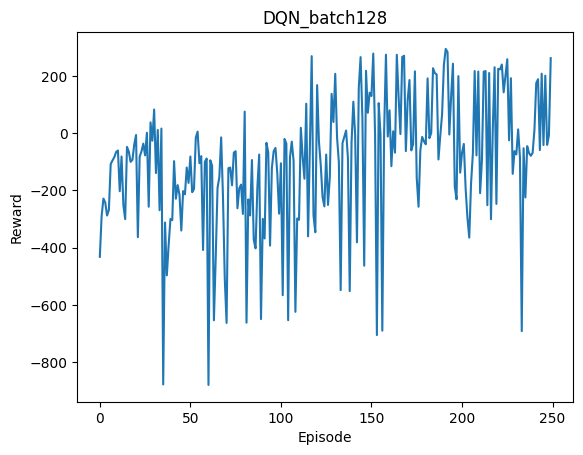

0

In [20]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

## DDQN

In [24]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import copy

# Mine
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import copy

class DDQNAgent():
    def __init__(self, state_size, action_size, batch_size, gamma=0.99, buffer_size=25000, alpha=1e-4, tau=1e-3):
        self.state_size = state_size
        self.action_size = action_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau  # For soft update of target network parameters
        self.experience_replay = ExperienceReplay(buffer_size)

        # Main network
        self.value_net = DeepQNetwork(state_size, action_size).to(device)
        # Target network
        self.target_net = DeepQNetwork(state_size, action_size).to(device)
        self.target_net.load_state_dict(self.value_net.state_dict())
        self.target_net.eval()  # Target network does not train

        self.optimizer = optim.Adam(self.value_net.parameters(), lr=alpha)

    def take_action(self, state, eps=0.0):
        self.value_net.eval()
        if random.random() > eps:
            with torch.no_grad():
                return torch.argmax(self.value_net(torch.tensor(state).float().unsqueeze(0).to(device))).item()
        else:
            return np.random.randint(0, self.action_size)

    def update_params(self):
        if len(self.experience_replay) < self.batch_size:
            return
        batch = Transition(*zip(*self.experience_replay.sample(self.batch_size)))

        state_batch = torch.tensor(np.array(batch.state), dtype=torch.float32).to(device)
        action_batch = torch.tensor(batch.action, dtype=torch.int64).unsqueeze(1).to(device)
        next_state_batch = torch.tensor(np.array(batch.next_state), dtype=torch.float32).to(device)
        reward_batch = torch.tensor(batch.reward, dtype=torch.float32).unsqueeze(1).to(device)
        done_batch = torch.tensor(batch.done, dtype=torch.float32).unsqueeze(1).to(device)

        q_expected = self.value_net(state_batch).gather(1, action_batch)

        # Double DQN: Use value_net to select action, target_net to estimate Q-value
        next_action_batch = torch.argmax(self.value_net(next_state_batch), dim=1, keepdim=True)
        q_targets_next = self.target_net(next_state_batch).gather(1, next_action_batch).detach()
        q_targets = reward_batch + (self.gamma * q_targets_next * (1 - done_batch))

        loss = F.mse_loss(q_expected, q_targets)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Soft update target network parameters
        self.soft_update(self.value_net, self.target_net, self.tau)

    def soft_update(self, local_model, target_model, tau):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau * local_param.data + (1.0 - tau) * target_param.data)

    def save(self, fname):
        torch.save(self.value_net.state_dict(), fname)

    def load(self, fname):
        self.value_net.load_state_dict(torch.load(fname, map_location=device))


In [26]:
# NOTE: DON'T change values
n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 32

In [28]:
# training phase

# Initialize agent
agent = DDQNAgent(state_size, action_size, batch_size=BATCH_SIZE)

crs = np.zeros(n_episodes)  # cumulative rewards
crs_recent = deque(maxlen=25)  # recent cumulative rewards

for i_episode in range(1, n_episodes + 1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DDQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')


Episode 25	Average Reward: -107.69	Epsilon: 0.17
Episode 49	Average Reward: -39.18	Epsilon: 0.08Moviepy - Building video /content/DDQN/batch32/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch32/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch32/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -27.21	Epsilon: 0.08
Episode 75	Average Reward: 77.66	Epsilon: 0.04
Episode 99	Average Reward: 111.80	Epsilon: 0.02Moviepy - Building video /content/DDQN/batch32/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch32/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch32/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 132.42	Epsilon: 0.02
Episode 125	Average Reward: 56.37	Epsilon: 0.01
Episode 149	Average Reward: 129.83	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch32/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch32/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch32/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 131.80	Epsilon: 0.01
Episode 175	Average Reward: 130.87	Epsilon: 0.01
Episode 199	Average Reward: 180.32	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch32/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch32/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch32/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 181.91	Epsilon: 0.01
Episode 225	Average Reward: 180.18	Epsilon: 0.01
Episode 249	Average Reward: 184.20	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch32/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch32/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch32/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: 171.21	Epsilon: 0.01


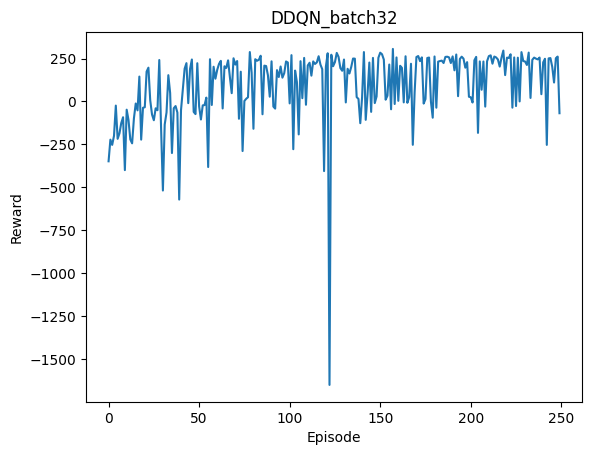

  adding: DDQN/ (stored 0%)
  adding: DDQN/batch32/ (stored 0%)
  adding: DDQN/batch32/eps200/ (stored 0%)
  adding: DDQN/batch32/eps200/rl-video-episode-0.meta.json (deflated 13%)
  adding: DDQN/batch32/eps200/rl-video-episode-0.mp4 (deflated 11%)
  adding: DDQN/batch32/eps150/ (stored 0%)
  adding: DDQN/batch32/eps150/rl-video-episode-0.meta.json (deflated 13%)
  adding: DDQN/batch32/eps150/rl-video-episode-0.mp4 (deflated 13%)
  adding: DDQN/batch32/eps100/ (stored 0%)
  adding: DDQN/batch32/eps100/rl-video-episode-0.meta.json (deflated 13%)
  adding: DDQN/batch32/eps100/rl-video-episode-0.mp4 (deflated 13%)
  adding: DDQN/batch32/eps50/ (stored 0%)
  adding: DDQN/batch32/eps50/rl-video-episode-0.meta.json (deflated 13%)
  adding: DDQN/batch32/eps50/rl-video-episode-0.mp4 (deflated 12%)
  adding: DDQN/batch32/eps250/ (stored 0%)
  adding: DDQN/batch32/eps250/rl-video-episode-0.meta.json (deflated 13%)
  adding: DDQN/batch32/eps250/rl-video-episode-0.mp4 (deflated 11%)


In [29]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DDQN_batch{BATCH_SIZE}")
plt.savefig(f"DDQN_batch{BATCH_SIZE}.pdf")
plt.show()
! zip -r DDQN3.zip DDQN/